In [29]:
%matplotlib inline

In [30]:
import pandas as pd
from pathlib import Path

### Pandas makes loading data easy

#### Let's pull down a bit of weather data from Central Park

In [31]:
url = 'https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/data/central_park_weather.csv'

In [32]:
df = pd.read_csv(url, parse_dates=['DATE'])

In [34]:
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-01,0.0,0.0,0.0,26,15,11.2
1,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-02,0.0,0.0,0.0,34,23,6.3
2,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-03,0.0,0.0,0.0,38,29,10.1
3,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-04,0.0,0.0,0.0,42,25,7.6
4,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-05,0.0,0.0,0.0,43,38,6.9


In [36]:
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)
Docstring:
Read CSV (comma-separated) file

In [35]:
df.dtypes

STATION                 object
STATION_NAME            object
DATE            datetime64[ns]
PRCP                   float64
SNWD                   float64
SNOW                   float64
TMAX                     int64
TMIN                     int64
AWND                   float64
dtype: object

### Grouped aggregations (`GROUP BY` in SQL) are very easy to write

#### Average max temperature per year

In [37]:
df

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-01,0.00,0.0,0.0,26,15,11.2
1,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-02,0.00,0.0,0.0,34,23,6.3
2,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-03,0.00,0.0,0.0,38,29,10.1
3,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-04,0.00,0.0,0.0,42,25,7.6
4,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-05,0.00,0.0,0.0,43,38,6.9
5,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-06,0.08,0.0,0.0,38,31,6.7
6,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-07,1.19,0.0,0.0,38,31,10.5
7,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-08,0.00,0.0,0.0,38,29,11.4
8,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-09,0.00,0.0,0.0,32,26,9.6
9,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-10,0.14,0.0,1.0,30,23,6.7


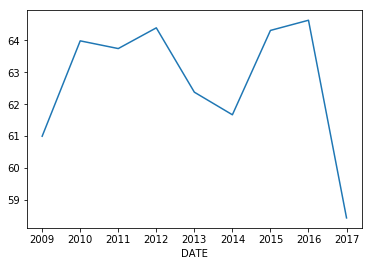

In [38]:
avg = df.groupby(df.DATE.dt.year).TMAX.mean()
avg.plot()

### Average monthly high, low temperature

In [39]:
df

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-01,0.00,0.0,0.0,26,15,11.2
1,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-02,0.00,0.0,0.0,34,23,6.3
2,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-03,0.00,0.0,0.0,38,29,10.1
3,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-04,0.00,0.0,0.0,42,25,7.6
4,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-05,0.00,0.0,0.0,43,38,6.9
5,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-06,0.08,0.0,0.0,38,31,6.7
6,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-07,1.19,0.0,0.0,38,31,10.5
7,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-08,0.00,0.0,0.0,38,29,11.4
8,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-09,0.00,0.0,0.0,32,26,9.6
9,GHCND:USW00094728,NY CITY CENTRAL PARK NY US,2009-01-10,0.14,0.0,1.0,30,23,6.7


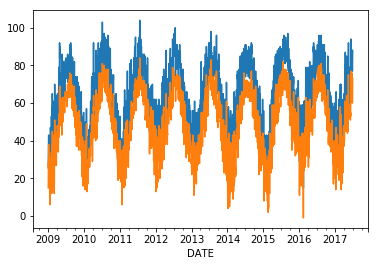

In [52]:
resamp = df.set_index('DATE').resample('D')
ax = resamp.TMAX.mean().plot()
resamp.TMIN.mean().plot(ax=ax)

### What's the relationship between # of rides and weather?

```sh
wget https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2017-01.csv
```

In [56]:
HOME = 'a/b'
del HOME

In [57]:
!du -h $HOME/fhv_tripdata_2017-01.csv

403M	/home/phillip/fhv_tripdata_2017-01.csv


In [46]:
%%time
taxi = pd.read_csv(Path('~') / 'fhv_tripdata_2017-01.csv', parse_dates=['Pickup_date'], usecols=['locationID', 'Pickup_date'])

CPU times: user 10.9 s, sys: 577 ms, total: 11.5 s
Wall time: 11.6 s


In [48]:
taxi.Pickup_date.dt.month.nunique()

1

In [49]:
pickup_date = taxi.Pickup_date
jan_taxi = taxi[pickup_date.dt.year.eq(2017) & pickup_date.dt.month.eq(1)]

In [50]:
jan

,Pickup_date,locationID
0,2017-01-01 00:30:00,NaN
1,2017-01-01 00:30:00,NaN
2,2017-01-01 06:15:00,NaN
3,2017-01-01 07:00:00,NaN
4,2017-01-01 11:00:00,NaN
5,2017-01-01 13:00:00,NaN
6,2017-01-01 14:00:00,NaN
7,2017-01-01 14:58:00,NaN
8,2017-01-01 15:12:00,NaN
9,2017-01-01 16:00:00,NaN


In [51]:
rides_per_day = (
    jan_taxi.set_index('Pickup_date')
            .locationID
            .resample('D')
            .count())
rides_per_day

Pickup_date
2017-01-01    353102
2017-01-02    234752
2017-01-03    265908
2017-01-04    255243
2017-01-05    284947
2017-01-06    330729
2017-01-07    357719
2017-01-08    328117
2017-01-09    302127
2017-01-10    286346
2017-01-11    292652
2017-01-12    299700
2017-01-13    342313
2017-01-14    397628
2017-01-15    341421
2017-01-16    268986
2017-01-17    332613
2017-01-18    302084
2017-01-19    312135
2017-01-20    357089
2017-01-21    354756
2017-01-22    324030
2017-01-23    337240
2017-01-24    350584
2017-01-25    311571
2017-01-26    331758
2017-01-27    369899
2017-01-28    411441
2017-01-29    335917
2017-01-30    276406
2017-01-31    298153
Freq: D, Name: locationID, dtype: int64

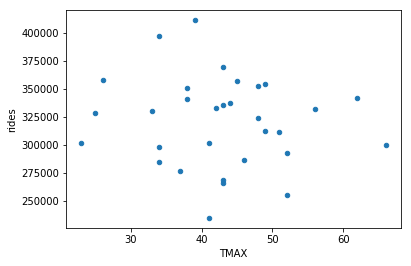

In [53]:
temp = resamp.TMAX.mean().loc['2017-01':'2017-01-31']
frame = temp.to_frame().assign(rides=rides_per_day)
frame.plot.scatter('TMAX', 'rides');